In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
file_path = "/Users/aleynakara/Documents/sympTome/support_posts.json"

In [3]:
from load_data import *

In [4]:
symptoms, treatments = json_to_dataframes(file_path)

In [5]:
symptoms

,post_id,user,title,description
0,1,TrainTravelerMax,Struggling to log into the train service website,I tried accessing the train login page today b...
1,2,HomeOfficeSally,Wi-Fi signal drops frequently when I move arou...,Whenever I go to the basement or the far end o...
2,3,GamerGuy89,Ping is fine but I can't load certain websites...,"My ping to the game servers is low and stable,..."
3,4,SmartphoneSusi,Phone connected to Wi-Fi but no internet access,My phone shows it’s connected to my home Wi-Fi...
4,5,OfficePaul,"After moving office desk, Wi-Fi barely works",I relocated my desk and suddenly Wi-Fi speed d...
...,...,...,...,...
89,103,OfficeUserTom,Wi-Fi driver update prevents auto reconnect,My laptop doesn't auto reconnect to saved Wi-F...
90,104,HomeUserEva,Ethernet driver update disables LAN sharing,"Since updating my Ethernet driver, my PC can't..."
91,105,TechStudentMaya,Network driver update causes limited connectivity,"After a network driver update, I get ‘limited ..."
92,106,StreamerAlex,New network driver causes packet loss during s...,"Since updating my network adapter driver, I ex..."


In [6]:
treatments

,user,comment_id,text,post_id
0,ITSupportAnna,1,VPNs often cause issues with specific sites. T...,1
1,NetworkNils,2,Sometimes browser cache or cookies cause loadi...,1
2,RouterFred,3,Your router might be too far or there could be...,2
3,NetworkNils,4,Sounds like DNS problems. Try switching your D...,3
4,NetworkNils,5,This often happens because of IP conflicts or ...,4
...,...,...,...,...
135,TechStudentMaya,156,Flushing DNS and resetting fixed the connectiv...,105
136,NetworkTech,157,Packet loss can be driver-related; try disabli...,106
137,StreamerAlex,158,Disabling that feature stopped the packet loss...,106
138,SupportGuy,159,Check if the update disabled the hosted networ...,107


In [7]:
from preprocess import preprocess_text
from load_data import SYMPTOM, TREATMENT, CAUSE

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/aleynakara/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/aleynakara/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/aleynakara/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [8]:
do_stemming, do_lemmatizing = False, True
symptoms = preprocess_text(
    symptoms, SYMPTOM, do_stemming=do_stemming, do_lemmatizing=do_lemmatizing
)
symptoms = preprocess_text(
    symptoms, CAUSE, do_stemming=do_stemming, do_lemmatizing=do_lemmatizing
)
treatments = preprocess_text(
    treatments, TREATMENT, do_stemming=do_stemming, do_lemmatizing=do_lemmatizing
)

In [9]:
symptoms

,post_id,user,title,description
0,1,TrainTravelerMax,struggle log train service website,try access train login page today keep spin wi...
1,2,HomeOfficeSally,wifi signal drop frequently move around house,whenever go basement far end live room wifi ke...
2,3,GamerGuy89,ping fine cant load certain websites online game,ping game servers low stable cant load game fe...
3,4,SmartphoneSusi,phone connect wifi internet access,phone show connect home wifi try browse use ap...
4,5,OfficePaul,move office desk wifi barely work,relocate desk suddenly wifi speed drop dramati...
...,...,...,...,...
89,103,OfficeUserTom,wifi driver update prevent auto reconnect,laptop doesnt auto reconnect save wifi network...
90,104,HomeUserEva,ethernet driver update disable lan share,since update ethernet driver pc cant share fil...
91,105,TechStudentMaya,network driver update cause limit connectivity,network driver update get limit connectivity wifi
92,106,StreamerAlex,new network driver cause packet loss stream,since update network adapter driver experience...


In [10]:
from embedding import embed

In [11]:
embedding_type = "openai"

In [12]:
# symptom_embeddings, *_ = embed(symptoms, SYMPTOM, embedding_type, f"./output/{SYMPTOM}_{embedding_type}_emb.csv")
# cause_embeddings, *_ = embed(symptoms, CAUSE, embedding_type, f"./output/{CAUSE}_{embedding_type}_emb.csv")
# treatment_embeddings, *_ = embed(
#     treatments, TREATMENT, embedding_type, f"./output/{TREATMENT}_{embedding_type}_emb.csv")

In [13]:
symptom_embeddings = pd.read_csv(
    f"./output/{SYMPTOM}_{embedding_type}_emb.csv", index_col=0
)
cause_embeddings = pd.read_csv(
    f"./output/{CAUSE}_{embedding_type}_emb.csv", index_col=0
)
treatment_embeddings = pd.read_csv(
    f"./output/{TREATMENT}_{embedding_type}_emb.csv", index_col=0
)

In [14]:
from clustering import cluster

In [15]:
clustering_type = "hdbscan"
params = {
    "min_cluster_size": 5,
    "min_samples": 1,
}

In [16]:
clustering_type = "kmeans"
params = {"n_clusters": 7, "random_state": 42}

In [17]:
symptom_clusters = cluster(symptom_embeddings, clustering_type, params)

In [18]:
from plotting import plot_clustering_results_2d

/Users/aleynakara/miniconda3/envs/symp/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [19]:
symptom_labels = symptom_clusters[clustering_type]["labels"]

In [20]:
reducer = "umap"

/Users/aleynakara/miniconda3/envs/symp/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/aleynakara/miniconda3/envs/symp/lib/python3.10/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


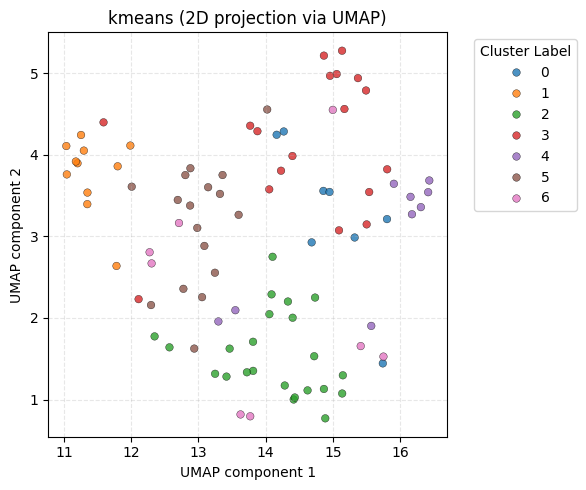

In [21]:
plot_clustering_results_2d(
    symptom_embeddings, symptom_labels, clustering_type, reducer=reducer
)

In [22]:
from keyword_extraction import extract_keywords

/Users/aleynakara/miniconda3/envs/symp/lib/python3.10/site-packages/fuzzywuzzy/fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')
Note: Environment variable`HF_TOKEN` is set and is the current active token independently from the token you've just configured.


In [23]:
keyword_method = "keybert"

symptoms = extract_keywords(symptoms, [SYMPTOM], keyword_method)
symptoms = extract_keywords(symptoms, [CAUSE], keyword_method)
treatments = extract_keywords(treatments, [TREATMENT], keyword_method)

In [24]:
# symptom_keyword_embeddings, *_ = embed(symptoms, f'{SYMPTOM}_keywords', embedding_type, f"./output/{SYMPTOM}_{embedding_type}_keywords_emb.csv")
# cause_keyword_embeddings, *_ = embed(symptoms, f'{CAUSE}_keywords', embedding_type, f"./output/{CAUSE}_{embedding_type}_keywords_emb.csv")
# treatment_keyword_embeddings, *_ = embed(
#     treatments, f'{TREATMENT}_keywords', embedding_type, f"./output/{TREATMENT}_{embedding_type}_keywords_emb.csv"
# )

In [25]:
symptom_keyword_embeddings = pd.read_csv(
    f"./output/{SYMPTOM}_{embedding_type}_keywords_emb.csv", index_col=0
)
cause_keyword_embeddings = pd.read_csv(
    f"./output/{CAUSE}_{embedding_type}_keywords_emb.csv", index_col=0
)
treatment_keyword_embeddings = pd.read_csv(
    f"./output/{TREATMENT}_{embedding_type}_keywords_emb.csv", index_col=0
)

In [26]:
clustering_type = "kmeans"
params = {"n_clusters": 8, "random_state": 42}

In [27]:
clustering_type = "hdbscan"
params = {
    "min_cluster_size": 5,
    "min_samples": 60,
}

In [28]:
symptom_keywords_clusters = cluster(symptom_keyword_embeddings, clustering_type, params)

In [29]:
symptom_keywords_labels = symptom_keywords_clusters[clustering_type]["labels"]

/Users/aleynakara/miniconda3/envs/symp/lib/python3.10/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


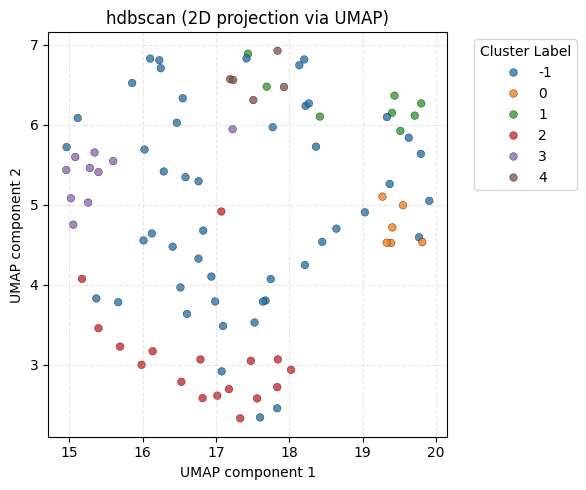

In [30]:
plot_clustering_results_2d(
    symptom_keyword_embeddings,
    symptom_keywords_labels,
    clustering_type,
    reducer=reducer,
)

In [31]:
symptoms["description_keywords"]

0     load strangely browse, access train login, web...
1     disconnect extremely slow, wifi disconnect ext...
2                 ping game servers, servers low stable
3                    wifi try browse, connect home wifi
4           relocate desk suddenly, suddenly wifi speed
                            ...                        
89    auto reconnect save, reconnect save wifi, does...
90    update ethernet driver, share file lan, ethern...
91     update limit connectivity, network driver update
92    driver experience packet, adapter driver exper...
93    hotspot feature stop, pc hotspot feature, upda...
Name: description_keywords, Length: 94, dtype: object

In [32]:
from transformers import AutoTokenizer, AutoModelForTokenClassification
from transformers import pipeline

tokenizer = AutoTokenizer.from_pretrained("dslim/distilbert-NER")
model = AutoModelForTokenClassification.from_pretrained("dslim/distilbert-NER")

nlp = pipeline("ner", model=model, tokenizer=tokenizer)

Device set to use mps:0


In [33]:
def extract_entities(text):
    """
    Run the NER pipeline on a single string and return the raw list of entities
    (each entity is a dict with keys like 'word', 'entity', 'score', 'start', 'end').
    You could also post-process if you want to collapse word-pieces, etc.
    """
    # if not isinstance(text, str) or text.strip() == "":
    #     return []  # handle empty or non‐string cells gracefully
    print(text)
    return nlp(text)


# Apply it to the DataFrame column:
symptoms[f"{SYMPTOM}_entities"] = symptoms[SYMPTOM].apply(extract_entities)

struggle log train service website
wifi signal drop frequently move around house
ping fine cant load certain websites online game
phone connect wifi internet access
move office desk wifi barely work
internet access work via ethernet wifi
vpn disconnect randomly video call
slow internet laptop
ping router internet access
company intranet accessible home
slow load university websites
upload cloud storage fail intermittently
cant access video conference audio wifi
move office desk wifi barely work
vpn connect access company servers
router reboot randomly peak hours
internet slow evenings
cant open sit campus wifi
slow stream use repeater
wifi connect file share coworkers
internet access work via ethernet wifi
high latency packet loss online game
corporate email sync mobile
wifi drop whenever microwave
vpn connect slow internet
cant print network printer wifi
cant access online exams portal dorm wifi
slow wifi add new smart devices
cant connect vpn coffee shop wifi
wifi signal strong video

In [34]:
symptoms[SYMPTOM]

0                    struggle log train service website
1         wifi signal drop frequently move around house
2      ping fine cant load certain websites online game
3                    phone connect wifi internet access
4                     move office desk wifi barely work
                            ...                        
89            wifi driver update prevent auto reconnect
90             ethernet driver update disable lan share
91       network driver update cause limit connectivity
92          new network driver cause packet loss stream
93    network driver update break hotspot functionality
Name: title, Length: 94, dtype: object

In [35]:
symptoms[f"{SYMPTOM}_entities"]

0     []
1     []
2     []
3     []
4     []
      ..
89    []
90    []
91    []
92    []
93    []
Name: title_entities, Length: 94, dtype: object

In [46]:
import os

os.environ["STANFORDTOOLSDIR"] = "/Users/aleynakara"
os.environ["CLASSPATH"] = "/Users/aleynakara/stanford-ner-2015-12-09/stanford-ner.jar"
os.environ["STANFORD_MODELS"] = "/Users/aleynakara/stanford-ner-2015-12-09/classifiers"

In [ ]:
from nltk.tag.stanford import StanfordNERTagger
from nltk.tokenize import word_tokenize

st = StanfordNERTagger("english.all.3class.distsim.crf.ser.gz")
stanford_dir = st._stanford_jar.rpartition("/")[0]
from nltk.internals import find_jars_within_path

stanford_jars = find_jars_within_path(stanford_dir)
st._stanford_jar = ":".join(stanford_jars)


def extract_keywords_stanford(text):
    """
    Extract keywords using Stanford NER.
    """
    if not isinstance(text, str) or text.strip() == "":
        return []  # handle empty or non‐string cells gracefully
    tokenized_text = word_tokenize(text)
    classified_text = st.tag(tokenized_text)
    return classified_text

In [52]:
x = symptoms[SYMPTOM].apply(extract_keywords_stanford)

In [55]:
x[2]

[autoreload of numpy.core.multiarray failed: Traceback (most recent call last):
  File "/Users/aleynakara/miniconda3/envs/symp/lib/python3.10/site-packages/IPython/extensions/autoreload.py", line 276, in check
    superreload(m, reload, self.old_objects)
  File "/Users/aleynakara/miniconda3/envs/symp/lib/python3.10/site-packages/IPython/extensions/autoreload.py", line 475, in superreload
    module = reload(module)
  File "/Users/aleynakara/miniconda3/envs/symp/lib/python3.10/importlib/__init__.py", line 169, in reload
    _bootstrap._exec(spec, module)
  File "<frozen importlib._bootstrap>", line 619, in _exec
  File "<frozen importlib._bootstrap_external>", line 883, in exec_module
  File "<frozen importlib._bootstrap>", line 241, in _call_with_frames_removed
  File "/Users/aleynakara/miniconda3/envs/symp/lib/python3.10/site-packages/numpy/core/multiarray.py", line 1, in <module>
    from numpy._core import multiarray
  File "/Users/aleynakara/miniconda3/envs/symp/lib/python3.10/site

[('ping', 'O'),
 ('fine', 'O'),
 ('cant', 'O'),
 ('load', 'O'),
 ('certain', 'O'),
 ('websites', 'O'),
 ('online', 'O'),
 ('game', 'O')]